# K nearest neighbour


In [76]:
# non parametric - it doesnt have any assumptions, no restrictions
# lazy learning - very less training is happening algo learns while testing
# For n=1000 cases, I would bet that the optimal k is somewhere between 1 and 19
# Uses Euclidean distance or pythagoras 
# k always take odd values and cant have high values
# If the input data has more outliers or noise, a higher value of k would be better
# TASK yyy Ecludian distance is used here
#  there is no explicit training phase


# KNN


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("C:/Users/Welcome/Downloads/KNN_Project_Data")
df

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1343.060600,1289.142057,407.307449,567.564764,1000.953905,919.602401,485.269059,668.007397,1124.772996,2127.628290,0
996,938.847057,1142.884331,2096.064295,483.242220,522.755771,1703.169782,2007.548635,533.514816,379.264597,567.200545,1
997,921.994822,607.996901,2065.482529,497.107790,457.430427,1577.506205,1659.197738,186.854577,978.340107,1943.304912,1
998,1157.069348,602.749160,1548.809995,646.809528,1335.737820,1455.504390,2788.366441,552.388107,1264.818079,1331.879020,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [5]:
df.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


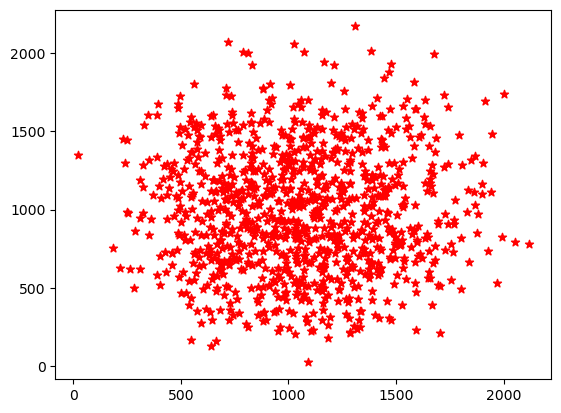

In [10]:
plt.scatter(df['XVPM'],df['GWYH'],color="red",marker="*")


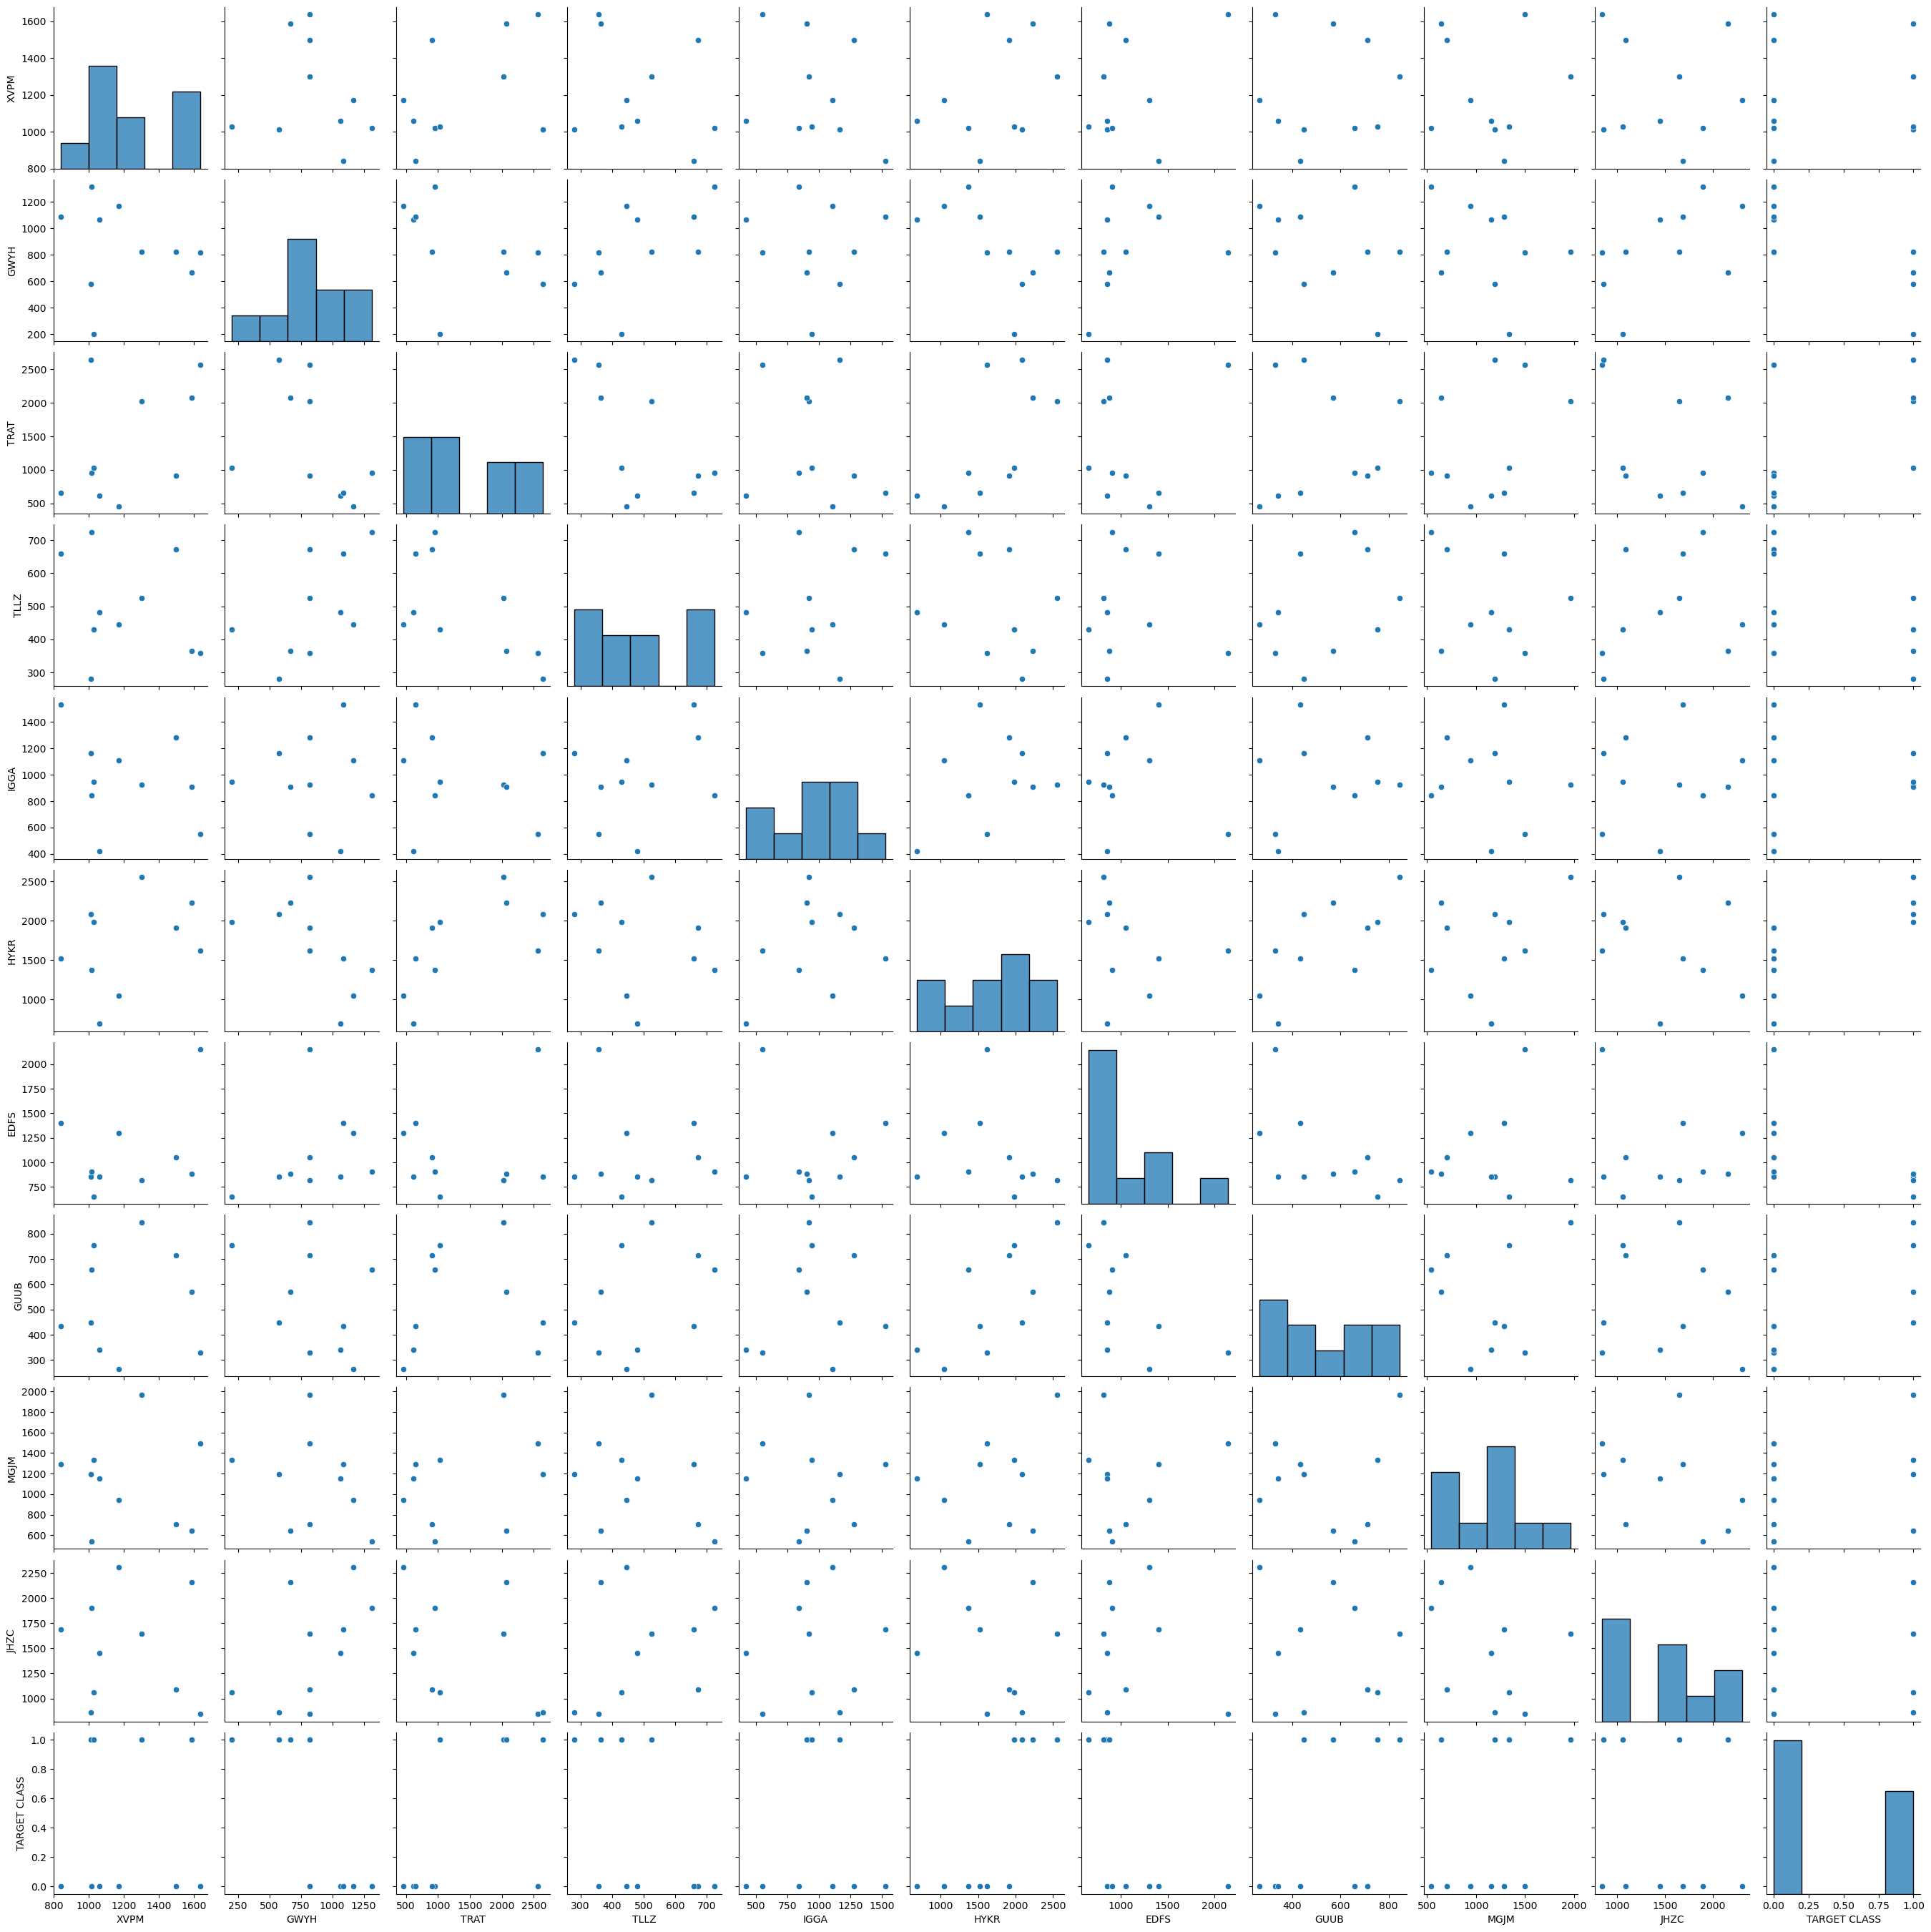

In [7]:
sns.pairplot(df.head(10))

<Axes: ylabel='count'>

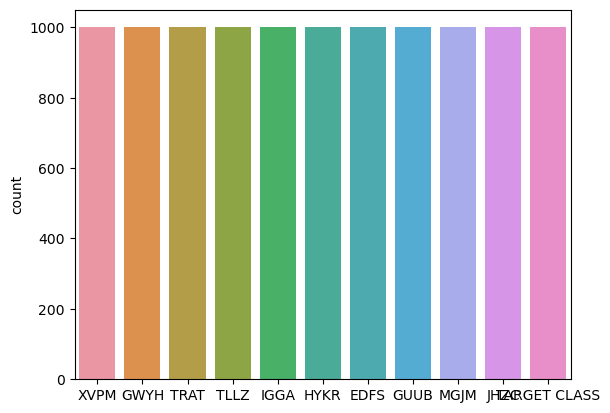

In [11]:
sns.countplot(df)

In [13]:
df.query("XVPM>=1500 and TLLZ>=350")

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
5,1587.993461,667.420121,2072.048544,364.624958,905.011385,2229.178514,880.442566,568.698408,645.719217,2156.949990,1
17,1656.397158,1246.507359,819.564695,759.176657,1177.173127,1138.812756,2028.880845,774.385137,1220.454072,1511.862543,0
18,1659.985069,564.261480,1330.514249,351.212679,1133.611093,1401.643495,1537.033328,185.944509,704.436036,1530.576756,1
20,1590.953919,1642.642026,1441.558864,452.355252,1185.151256,1271.075752,1601.723480,33.795840,1393.799311,1367.835696,0
...,...,...,...,...,...,...,...,...,...,...,...
941,1521.562360,780.054122,1789.479062,433.366400,698.087927,1083.287744,1794.568887,906.396439,131.171882,1854.165650,1
948,1588.018706,527.674476,1879.159093,565.988996,1491.769512,1878.071948,1028.802170,950.376930,1352.620203,2090.749520,1
953,1539.690223,1033.713038,2357.005771,542.056811,764.353905,1514.671213,2146.761028,877.446199,226.573630,1272.853874,1
955,1685.208358,1460.462263,2210.045065,651.741054,853.809300,1970.195432,1895.051939,596.527325,1892.782869,1877.597228,0


# Feature Scaling

In [17]:
# Normalization Standarzation
# minmax scalar standard scalar
# ranges 0 to 1 range mean=0 and std dev=1

# since we are using KNN algo, we are scaling down the DF to range of -1 to 1

In [18]:
from sklearn.preprocessing import StandardScaler # mean = 0 and SD = 1 
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled = scaler.transform(df.drop('TARGET CLASS',axis=1))
scaled

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [19]:
type(scaled)

numpy.ndarray

In [24]:
# since we got array as return type we have to convert it into DF form to perform operations
# converting array to dataframe
scaleddf = pd.DataFrame(scaled, columns = df.columns[:-1])
scaleddf

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762
...,...,...,...,...,...,...,...,...,...,...
995,0.776682,0.758234,-1.753322,0.507699,0.174588,-1.279354,-1.797957,0.431419,0.088717,1.188886
996,-0.313446,0.385206,0.885502,-0.083136,-1.208486,0.309242,0.746346,-0.112571,-1.763636,-1.559081
997,-0.358895,-0.979015,0.837715,0.014018,-1.397424,0.054473,0.164120,-1.514726,-0.275122,0.864287
998,0.275080,-0.992399,0.030371,1.062954,1.142871,-0.192872,2.051386,-0.036233,0.436685,-0.212456


In [26]:
type(scaleddf) # we converted array to dataframe observe In [19]

pandas.core.frame.DataFrame

In [28]:
x = scaleddf
y = df['TARGET CLASS']

In [29]:
x

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762
...,...,...,...,...,...,...,...,...,...,...
995,0.776682,0.758234,-1.753322,0.507699,0.174588,-1.279354,-1.797957,0.431419,0.088717,1.188886
996,-0.313446,0.385206,0.885502,-0.083136,-1.208486,0.309242,0.746346,-0.112571,-1.763636,-1.559081
997,-0.358895,-0.979015,0.837715,0.014018,-1.397424,0.054473,0.164120,-1.514726,-0.275122,0.864287
998,0.275080,-0.992399,0.030371,1.062954,1.142871,-0.192872,2.051386,-0.036233,0.436685,-0.212456


In [30]:
y

0      0
1      1
2      1
3      0
4      0
      ..
995    0
996    1
997    1
998    1
999    1
Name: TARGET CLASS, Length: 1000, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
X_train

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
663,0.671835,1.340325,-2.199505,-1.127131,-0.760380,-0.319734,0.052679,1.351520,-1.141792,0.012697
788,-0.215305,0.823368,-0.867907,-0.292560,-2.668575,-1.578020,0.004323,0.104867,0.348186,0.469089
925,-0.079932,0.156191,1.214337,1.929290,0.389986,-1.703215,-0.470959,-0.619659,0.794042,0.033820
514,-0.970479,-1.035361,-1.463914,-1.008219,0.643645,0.967470,-0.256215,0.553248,0.846081,1.407480
301,-0.464932,1.993652,1.482964,-0.430403,-0.827215,1.041694,-0.060185,-1.075696,0.547903,0.887163
...,...,...,...,...,...,...,...,...,...,...
846,0.047801,-1.354538,0.253827,0.046835,1.152841,1.084072,1.106154,-0.464766,1.109036,-1.048256
168,0.635197,1.190509,0.302650,0.056931,-0.407845,1.626306,-0.146081,-0.588750,-0.251595,2.041626
752,-1.021376,-0.942746,0.498380,-0.731542,-0.148947,1.595486,0.802514,-0.073591,0.401411,-1.661753
539,-0.648714,2.572698,0.741364,0.057296,-0.708829,-0.152717,-0.101863,1.018091,-1.328505,1.039192


In [38]:
X_test

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
181,0.044995,0.457302,-1.977593,-0.557097,-0.420204,1.184499,0.347009,-0.718262,0.159660,1.046786
996,-0.313446,0.385206,0.885502,-0.083136,-1.208486,0.309242,0.746346,-0.112571,-1.763636,-1.559081
825,1.751175,-1.987347,-0.095340,-0.625231,0.951927,-1.257398,0.271588,0.123289,0.267019,-0.749280
773,-0.977594,0.369806,-0.431817,0.723388,0.222496,1.994943,-0.515839,-0.800907,-0.024084,-0.042433
327,-0.178004,0.699660,0.074140,1.537693,0.274784,-0.298751,1.164250,-0.211387,-1.633374,-0.274726
...,...,...,...,...,...,...,...,...,...,...
779,1.622721,0.520046,0.276570,0.793890,1.265719,-1.065805,-1.029222,0.656589,1.999230,1.550991
884,0.897629,0.504203,0.167427,1.526383,-1.869491,-0.374559,0.723769,2.067418,1.139497,-0.503969
823,-1.129297,-0.615522,0.208013,1.333985,-0.519638,0.670735,-0.562684,-0.316737,-0.084047,-1.381874
826,-1.404274,1.233766,-0.169000,0.100639,0.091035,0.998668,0.076438,-0.618126,2.169339,1.013279


# Model building

In [48]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
err = []

for i in range(1,20,2): # 0 to 19
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    err.append(np.mean(pred_i !=y_test))

In [49]:
err

[0.26666666666666666,
 0.24333333333333335,
 0.21666666666666667,
 0.17,
 0.17333333333333334,
 0.17,
 0.17333333333333334,
 0.17333333333333334,
 0.17,
 0.17333333333333334]

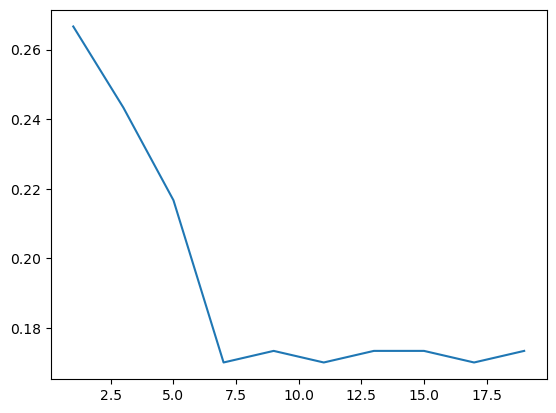

In [53]:
plt.plot(range(1,20,2),err)

In [71]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [72]:
knn.predict(X_test)

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1], d

In [73]:
knn.score(X_test,y_test)

0.83

In [74]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[131,  36],
       [ 15, 118]], dtype=int64)

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84       167
           1       0.77      0.89      0.82       133

    accuracy                           0.83       300
   macro avg       0.83      0.84      0.83       300
weighted avg       0.84      0.83      0.83       300

